In [76]:
# importing essenstial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# fetching data
df = pd.read_csv('NetFlixData.csv', encoding='latin')

In [3]:
df.head(5)

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
ID                  1682 non-null int64
Title               1682 non-null object
ReleaseDate         1681 non-null object
VideoReleaseDate    0 non-null float64
IMDB                1679 non-null object
Unknown             1682 non-null int64
Action              1682 non-null int64
Adventure           1682 non-null int64
Animation           1682 non-null int64
Childrens           1682 non-null int64
Comedy              1682 non-null int64
Crime               1682 non-null int64
Documentary         1682 non-null int64
Drama               1682 non-null int64
Fantasy             1682 non-null int64
FilmNoir            1682 non-null int64
Horror              1682 non-null int64
Musical             1682 non-null int64
Mystery             1682 non-null int64
Romance             1682 non-null int64
SciFi               1682 non-null int64
Thriller            1682 non-null int64
War        

In [5]:
df.isna().sum()

ID                     0
Title                  0
ReleaseDate            1
VideoReleaseDate    1682
IMDB                   3
Unknown                0
Action                 0
Adventure              0
Animation              0
Childrens              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
FilmNoir               0
Horror                 0
Musical                0
Mystery                0
Romance                0
SciFi                  0
Thriller               0
War                    0
Western                0
dtype: int64

In [6]:
df = df.drop(['VideoReleaseDate', 'ID'], axis=1)
df.dropna(inplace=True)

In [7]:
df.shape

(1679, 22)

In [8]:
df.describe()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
count,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000,1679.000000
mean,0.000596,0.148898,0.080405,0.025015,0.072662,0.300774,0.064920,0.029780,0.431209,0.013103,0.014294,0.054795,0.033353,0.036331,0.147111,0.060155,0.149494,0.042287,0.016081
std,0.024405,0.356094,0.272000,0.156217,0.259659,0.458731,0.246457,0.170029,0.495393,0.113750,0.118736,0.227647,0.179611,0.187169,0.354322,0.237844,0.356681,0.201303,0.125825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
num_df = pd.DataFrame()
for i in df.columns:
    if df[i].dtype != 'object':
        num_df[i] = df[i]

In [10]:
num_df.shape

(1679, 19)

In [16]:
num_df.head()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [29]:
# performing heirarchical clustering
ward_linkage = linkage(num_df, method='ward')

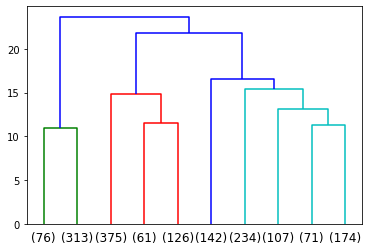

In [36]:
dend = dendrogram(ward_linkage, p=10, truncate_mode='lastp', labels=list(num_df))

In [51]:
clusters = fcluster(ward_linkage, 15, criterion='distance')

In [52]:
clusters

array([3, 4, 5, ..., 2, 1, 2], dtype=int32)

In [53]:
num_df['n_cluster(Agg)'] = clusters

In [54]:
num_df.head()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,n_cluster(Agg)
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,5


In [55]:
num_df.to_csv('output.csv', index=False)

In [67]:
# using Kmeans Clustering
wss = []
for i in range(1,21):
    model = KMeans(n_clusters=i, random_state=40)
    model.fit(num_df)
    wss.append(model.inertia_)

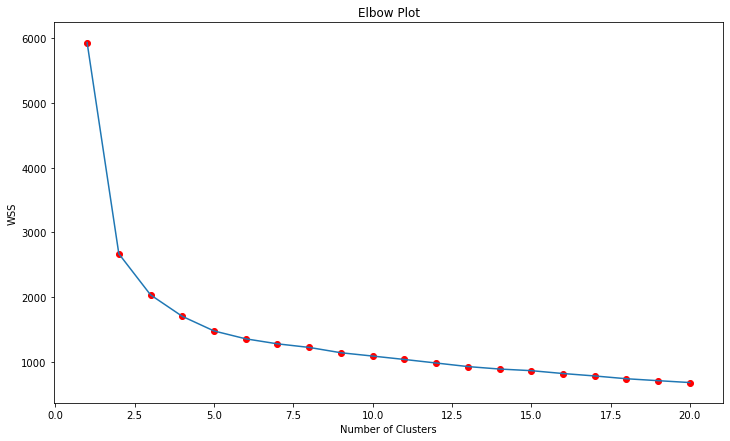

In [75]:
plt.figure(figsize=(12,7));
x_line = [i for i in range(1,21)]
plt.plot(x_line, wss);
plt.scatter(x_line, wss, c='r');
plt.xlabel('Number of Clusters');
plt.ylabel('WSS');
plt.title('Elbow Plot');

In [74]:
# Therefore, we will go with n_clusters = 3

In [77]:
model = KMeans(n_clusters=3, random_state=40)

In [78]:
model.fit(num_df)

KMeans(n_clusters=3, random_state=40)

In [80]:
model.inertia_

2035.6660351078124

In [82]:
clusters = model.labels_

In [85]:
silhouette_score_for_row = silhouette_samples(num_df, clusters)

In [84]:
silhouette_score(num_df, clusters)

0.44695090488259764

In [86]:
# since silhouette score is positive and eqauls to 45 hence, our model is good for fit.

In [90]:
sil = []
for i in range(1,21):
    model = KMeans(n_clusters=i, random_state=40)
    model.fit(num_df)
    if i != 1: 
        sil.append(silhouette_score(num_df, model.labels_))

In [91]:
sil

[0.5071701020700216,
 0.44695090488259764,
 0.4296393371706042,
 0.44737409652468907,
 0.4653762865265216,
 0.4535507640101659,
 0.4731113277751138,
 0.4707059463148925,
 0.48065808268244775,
 0.4856945836984086,
 0.499234480549547,
 0.5480862091980733,
 0.5548289275627024,
 0.5556830330764908,
 0.5650862315947329,
 0.5717743541500908,
 0.596539719273314,
 0.5985716839639179,
 0.6070518909949987]

In [92]:
num_df['n_clusters(KMeans)'] = clusters

In [93]:
num_df.to_csv('output.csv', index=False)